# import packages

In [1]:
from SPECTRA_processing_utils import *

In [2]:
import scanpy as sc
import scanpy.external as sce
import anndata as anndata
from anndata import AnnData
import time
import os
import numpy as np
import seaborn as sns
import pandas as pd
import re
import h5py
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.font_manager
import glob
from collections import OrderedDict
from scipy.sparse import csr_matrix
from scanpy.external.pp import magic
from scipy.stats import zscore
import scipy.cluster.hierarchy as hc
from statistics import median
import math
from typing import Union
import numpy.matlib

In [3]:
DATA_DIR = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/'
DATA_DIR_2 = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data_final/'
fig_save_path =  '/data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/'

In [4]:
#set style
sns.set_style('white')
# define colors
color_map_clusters = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

color_map_clusters_nogrey = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

batlow_20 = ['#1d2356','#1d2b59',
'#14375e',
'#134460',
'#1c5261',
'#235f5f',
'#396a58',
'#4c714e',
'#607843',
'#757e36',
'#8d8532',
'#a78b30',
'#c49138',
'#dc954d',
'#f09c6a',
'#f8a487',
'#f8aca2',
'#f8b5be',
'#f8c2d9',
'#eecbe1'] 
import random
random.seed(1)
random.shuffle(batlow_20)

blue_red = ['#0E518F','#DF480F']

subtype_color_dict = {'global':'#FFFFFF','TAM':'#FFFF00',
                 'DC_cDC2A':'#1CE6FF',
                 'pDC':'#FF34FF',
                 'M-MDC':'#FF4A46',
                 'mono_c':'#008941',
                 'mast':'#006FA6',
                      'TAM_TRMac':'#456D75',
                 'DC_cDC1':'#A30059',
                 'Gr-MDC':'#7A4900',
                 'DC_Langerhans':'#0000A6',
                      'DC_AXLpos_ITGAXpos':'#0CBD66',
                      'DC_FDC_PTPRCpos':'#EEC3FF',
                'DC_cDC3':'#63FFAC',
                'CD8_T':'#B79762',
                'Treg':'#004D43',
                'CD4_T':'#8FB0FF',
                'CD8_T':'#997D87',
                 'NK':'#5A0007',
                 'gdT':'#809693',
                    'ILC3':'#7900D7',
                       'CD8_T_KLRG1pos_effector_preexhausted':'#4FC601',
                 'CD4_T_naive':'#3B5DFF',
                 'CD4_T_TH1':'#4A3B53',
                 'CD8_T_TRM':'#FF2F80',
                'CD8_T_TRM_exhausted':'#61615A',
                 'CD8_T_naive':'#BA0900',
                 'CD8_T_KLRG1pos_effector_preexhausted':'#6B7900',
             'CD4_T_naive_low_libsize':'#00C2A0',
                 'CD8_T_naive':'#FFAA92',
             'NK_CD56bright':'#FF90C9',
                 'CD8_T_TEM_effector_exhausted-progenitor':'#B903AA',
            'gdT':'#D16100',
              'CD8_T_KLRG1pos_effector_nonexhausted':'#DDEFFF',
              'CD8_T_TRM_exhausted_proliferating':'#000035',
            'CD4_T_TH1_proliferating':'#7B4F4B',
               'NK_CD56dim':'#A1C299',
               'Treg':'#300018',
                  'CD8_T_KLRG1pos_effector_preexhausted':'#0AA6D8',
                         'MDC':'#013349',
                 'DC':'#00846F',
                'mixed_T_M':'#636375',
                        'B_memory':'#372101',
                
                 'B_naive':'#FFB500',
                'plasma':'#C2FFED',
                'B_GC':'#A079BF',
                    'B_memory_switched':'#CC0744',
                'plasma_IgA':'#C0B9B2',
                 'B_memory_double_neg':'#C2FF99',
               'plasma_IgG':'#001E09',
                'plasmablast':'#00489C',
               'plasma_Be1':'#6F0062',
                     'M':'#B77B68',
                     'TNK':'#7A87A1',
                     'B':'#788D66',
                     'TAM_MKlike':'#885578',
                     'mono':'#34362D',
                     'mono_c':'#B4A8BD',
                     'mono_nc':'#00A6AA',
                     'ILC1':'#452C2C',
                     'CD4_T_TFH':'#A3C8C9',
                     'CD4_T_TFH_exhausted-progenitor':'#FF913F',
                     'CD4_T_TSCM':'#938A81',
                     'CD8_T_KLRG1neg_effector_preexhausted':'#575329',
                     'CD8_T_KLRG1pos_effector_exhausted':'#00FECF',
                     'CD8_T_TRM_nonexhausted':'#B05B6F',
                     'CD8_T_innate-like':'#8CD0FF',
                     'TNK_proliferating':'#3B9700',
                     'NK_CD56dim_proliferating':'#04F757',
                     'T':'#C8A1A1',
                     'T_proliferating':'#1E6E00',
                     'B_memory':"#BC23FF",
                      'B_naive':"#A77500",
                      'plasma':"#6367A9",
                 'B_GC':"#A05837",
                      'B_memory_switched':"#6B002C",
                 'B_naive':"#772600",
              'plasma_IgA':"#D790FF",
                'B_memory_double_neg':"#9B9700",
               'plasma_IgG':"#549E79",
                 'plasmablast':"#FFF69F",
                'plasma_IgG':"#201625",
                 'plasma_Be1':"#72418F",
                      'B':"#922329", 
                      'TNK':"#99ADC0",
                      'M': "#3A2465",
                      'nan':'#000000',
                      'B_GC_proliferating':'#5B4534',
                      'B_memory_switched_Be1':'#FDE8DC',
                      'B_memory_switched_proliferating':'#404E55',
                      'plasma_IgG_Be1':'#0089A3',
                       'B_proliferating':'#CB7E98'
                }

expansion_dict = {'NE':'#0E518F','E': '#DF480F','nan':'#dedede'}
timepoint_dict = {'Pre':'#0E518F','On': '#DF480F','nan':'#dedede'}
perturbation_map = ['#EFD060','#0289DE','#0289DE','#DCA6C4']
stage_map = ['#EFD060','#0289DE','#67C6F8','#DCA6C4']
stage_map_2 = ['#EFD060','#0289DE','#DCA6C4']
perturbation_stage_map_2 = ['#F95957', '#FF0300','#EFD060','#0289DE','#0289DE','#DCA6C4','#EFD060','#0289DE','#DCA6C4']
perturbation_stage_map = ['#F95957', '#FF0300','#e1e1e1','#e1e1e1','#e1e1e1','#e1e1e1', '#EFD060','#0289DE','#DCA6C4']
color_map_clusters_plt = cm = LinearSegmentedColormap.from_list(
        'color_map_clusters', color_map_clusters)
treat_untreat_palette = ['#0E518F', '#DF480F', '#a7a7a7']
#scanpy layout
sc.set_figure_params(scanpy=True, dpi=300, dpi_save=300, frameon=False, vector_friendly=True, fontsize=7, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=True, ipython_format='png2x')
sns.set_style('white')

# TAM neighborhood comparison

In [5]:
adata_neigh_path = DATA_DIR + 'TIL-X-BRCA-X-Zhang-X-2021-X-all_cells_raw_annotated_clustered_nodrops_nodoub_tumor_scran_labeled_clustered_annotated_211208_removed-doublets_neighbors_SDPD_atezoonly.h5ad'
adata_path = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data_final/TIL-X-BRCA-X-Zhang-X-2021-X-all_cells_raw_annotated_clustered_nodrops_nodoub_tumor_scran_labeled_clustered_annotated_211208_removed-doublets_naive0.1_delta_0.001_beta_0.0_pseudo_0.0_new_221001.h5ad'
OUT_RESULT_DIR = '/data/peer/wallet/Jupyter/SPADE_Peer_validation/data/milo_Zhang_PrevsOn_M_SDPD_atezoonly_220614/'

In [6]:
#load data
adata = sc.read(adata_path)
adata

Only considering the two last: ['.0_new_221001', '.h5ad'].
Only considering the two last: ['.0_new_221001', '.h5ad'].


AnnData object with n_obs × n_vars = 150985 × 20237
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'patient_id', 'biomaterial', 'timepoint', 'site', 'age', 'PD-L1_IC_Ventana', 'TIL', 'T', 'N', 'M', 'treatment', 'RECIST', 'biopsied_lesion_size', '8w_biopsied_lesion', 'target_lesion_size', '8w_target_lesion', 'PFS', 'last_follow_up', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'annotation_SPADE_1', 'annotation_SPADE_2', '0-X-all_multidrug-resistance', '1-X-all_porphyrine-heme_metabolism', '2-X-all_TNF-via-NFkB_signaling', '3-X-all_glyoxylate-dicarboxylate_metabolism', '4-X-all_IL6-JAK-STAT3_signaling', '5-X-all_fatty-acid-beta-oxidation-peroxisomal', '6-X-all_triacylglycerol_synthesis', '7-X-all_circadian-rhythm', '8-X-all_heparan-sul

In [7]:
#invasion factor marker genes from Bassez et al dataset
gene_set_list = ['SPP1', 'MMP9', 'CTSL', 'CCL2', 'APOC1', 'RNASE1', 'NUPR1',
        'C15orf48', 'GPNMB', 'CXCL8', 'ADM', 'SMIM25', 'FBP1', 'MMP19',
        'SLC11A1', 'CYP27A1', 'FABP4', 'MARCO', 'IL1RN', 'HMOX1', 'PLA2G7',
        'PLIN2', 'MT1H', 'FABP5', 'CD36', 'PLAUR', 'SDC2', 'MT1G', 'CD68',
        'FN1', 'BLVRB', 'APOE', 'UPP1', 'CHI3L1', 'ANXA2', 'CXCL3', 'SOD2',
        'TREM1', 'CCL7', 'TREM2', 'SCD', 'GLUL', 'CCL18', 'TYROBP',
        'NR1H3', 'NPL', 'CSTB', 'ANPEP', 'CTSD', 'LGALS3']
sc.tl.score_genes(adata, gene_set_list, ctrl_size=50, gene_pool=None, n_bins=25, score_name='score', random_state=0, copy=False, use_raw=None)


In [8]:
factor_name_list = [ 'score','0-X-all_multidrug-resistance-X-norm', '1-X-1-X-norm', '2-X-all_TNF-via-NFkB_signaling-X-norm', '3-X-all_glyoxylate-dicarboxylate_metabolism-X-norm', '4-X-all_IL6-JAK-STAT3_signaling-X-norm', '5-X-all_peroxisome-component-X-norm', '6-X-all_triacylglycerol_synthesis-X-norm', '7-X-all_circadian-rhythm-X-norm', '8-X-all_heparan-sulfate_degradation-X-norm', '9-X-9-X-norm', '10-X-all_TNF-via-NFkB_signaling-X-norm', '11-X-all_autophagy_regulation_positive-X-norm', '12-X-all_DNA-demethylation-X-norm', '13-X-all_TYR_metabolism-X-norm', '14-X-all_autophagy-of-mitochondria-X-norm', '15-X-all_autophagy-chaperone-mediated-X-norm', '16-X-all_transmembrane-transport-golgi-X-norm', '17-X-all_osmotic-stress-response-X-norm', '18-X-all_o-glycan_synthesis-X-norm', '19-X-all_transmembrane-transport-mitochondrial-X-norm', '20-X-TNK_cytotoxicity-effectors-X-norm', '21-X-all_protein-degradation-proteasome-X-norm', '22-X-all_posttranslation-modification-X-norm', '23-X-leuko_transendothelial-migration-X-norm', '24-X-all_autophagic-cell-death-X-norm', '25-X-all_MHC-I-presentation-X-norm', '26-X-all_histone-methylation-X-norm', '27-X-all_G2M-transition-X-norm', '28-X-all_LYS_metabolism-X-norm', '29-X-all_propanoate_metabolism-X-norm', '30-X-all_pterin_synthesis-X-norm', '31-X-all_oxidative-phosphorylation-X-norm', '32-X-all_creatinine_metabolism-X-norm', '33-X-all_mitophagy_regulation_positive-X-norm', '34-X-all_NAD_metabolism-X-norm', '35-X-all_wnt-beta-catenin-signaling-X-norm', '36-X-all_reticulophagy-X-norm', '37-X-all_macroautophagy-X-norm', '38-X-38-X-norm', '39-X-all_glycerin-SER-THR_metabolism-X-norm', '40-X-all_TCA-cycle-X-norm', '41-X-all_ROS-detoxification-X-norm', '42-X-all_protein-degradation-proteasome-X-norm', '43-X-all_xenobiotics_metabolism-X-norm', '44-X-44-X-norm', '45-X-all_apoptosis-X-norm', '46-X-46-X-norm', '47-X-47-X-norm', '48-X-all_bile-acid_synthesis-X-norm', '49-X-49-X-norm', '50-X-all_glyoxylate-dicarboxylate_metabolism-X-norm', '51-X-all_ros_response-X-norm', '52-X-all_n-glycan_synthesis-X-norm', '53-X-all_DNA-methylation-X-norm', '54-X-all_urea-cycle-X-norm', '55-X-all_type-I-ifn-response-X-norm', '56-X-all_glycogenesis-X-norm', '57-X-all_polyamines_metabolism-X-norm', '58-X-all_fructose-mannose_metabolism-X-norm', '59-X-all_thiamin_metabolism-X-norm', '60-X-60-X-norm', '61-X-all_porphyrine-heme_metabolism-X-norm', '62-X-all_NOTCH_signaling-X-norm', '63-X-all_purine_metabolism-X-norm', '64-X-all_nucleotide_metabolism-X-norm', '65-X-all_CoA_synthesis-X-norm', '66-X-all_platelet-activation-factor_production-X-norm', '67-X-all_ubiquinone_synthesis-X-norm', '68-X-all_CYP_metabolism-X-norm', '69-X-all_iron-uptake-and-storage-X-norm', '70-X-all_chondroitine-and-heparan-sulfate_synthesis-X-norm', '71-X-all_coagulation-factor_production-X-norm', '72-X-all_VAL-LEU-ILE_metabolism-X-norm', '73-X-all_glycogenolysis-X-norm', '74-X-all_HIS_metabolism-X-norm', '75-X-all_actin-cytoskeleton_regulation-X-norm', '76-X-all_lactate_production-X-norm', '77-X-all_SASP-X-norm', '78-X-all_eicosanoid_metabolism-X-norm', '79-X-all_riboflavin_metabolism-X-norm', '80-X-80-X-norm', '81-X-all_GPI-anchor_synthesis-X-norm', '82-X-all_cholesterol_metabolism-X-norm', '83-X-all_inositol-phosphate_metabolism-X-norm', '84-X-all_unfolded-protein-response-X-norm', '85-X-all_protein-degradation-proteasome-X-norm', '86-X-all_retinol_metabolism-X-norm', '87-X-all_cholesterol-homeostasis-X-norm', '88-X-all_sphingolipid_metabolism-X-norm', '89-X-all_transmembrane-transport-cellmembrane-X-norm', '90-X-all_MET_metabolism-X-norm', '91-X-all_pyrimidine_metabolism-X-norm', '92-X-all_TLR_signaling-X-norm', '93-X-all_ascorbate-uptake-X-norm', '94-X-all_transmembrane-transport-mitochondrial-X-norm', '95-X-all_TRP_metabolism-X-norm', '96-X-all_fatty-acid-beta-oxidation-mitochondrial-X-norm', '97-X-all_ARG-PRO_metabolism-X-norm', '98-X-all_selenoamino-acid_metabolism-X-norm', '99-X-all_galactose_metabolism-X-norm', '100-X-all_JAK-STAT_signaling-X-norm', '101-X-all_DNA_synthesis-X-norm', '102-X-all_G1S-transition-X-norm', '103-X-103-X-norm', '104-X-all_hyaluronan_metabolism-X-norm', '105-X-all_GABA-shunt-X-norm', '106-X-all_TNF-via-NFkB_signaling-X-norm', '107-X-all_GLU_metabolism-X-norm', '108-X-all_exocytosis-X-norm', '109-X-all_pyrimidine_synthesis-X-norm', '110-X-all_fatty-acid_synthesis-X-norm', '111-X-all_carnitine-shuttle-X-norm', '112-X-all_DNA-repair-X-norm', '113-X-all_biotin_metabolism-X-norm', '114-X-all_cyclic-nucleotide_metabolism-X-norm', '115-X-all_macroautophagy-X-norm', '116-X-all_p53-signaling-X-norm', '117-X-all_phosphoinositide_signaling-X-norm', '118-X-all_heparan-sulfate_degradation-X-norm', '119-X-all_autophagy-nucleus-X-norm', '120-X-all_glutathione_metabolism-X-norm', '121-X-all_thrombolysis-factor_production-X-norm', '122-X-all_ketone-body_metabolism-X-norm', '123-X-all_nucleophagy-late-X-norm', '124-X-all_autophagy-peroxisome-X-norm', '125-X-all_n-glycan_degradation-X-norm', '126-X-all_microautophagy-lysosomal-X-norm', '127-X-all_MHC-II-presentation-X-norm', '128-X-all_transmembrane-transport-ER-X-norm', '129-X-all_hypoxia-response-X-norm', '130-X-all_TGFb_response-X-norm', '131-X-131-X-norm', '132-X-all_RIG-I-like-receptor_signaling-X-norm', '133-X-all_amino-sugar-nucleotide-sugar_metabolism-X-norm', '134-X-all_mitotic-spindle-component-X-norm', '135-X-all_steroid_metabolism-X-norm', '136-X-all_MYC_targets-X-norm', '137-X-all_keratan-sulfate_synthesis-X-norm', '138-X-all_hedgehog_signaling-X-norm', '139-X-all_macroautophagy-X-norm', '140-X-all_pentose-phosphate-pathway-X-norm', '141-X-all_mTORC1_signaling-X-norm', '142-X-142-X-norm', '143-X-all_pyroptosis-X-norm', '144-X-144-X-norm', '145-X-all_ethanol_metabolism-X-norm', '146-X-all_taurine-hypotaurine_metabolism-X-norm', '147-X-all_glycerophospholipid_metabolism-X-norm', '148-X-all_complement_production-X-norm', '149-X-all_folate_metabolism-X-norm', '150-X-150-X-norm', '151-X-151-X-norm', '152-X-152-X-norm', '153-X-153-X-norm', '154-X-all_glyoxylate-dicarboxylate_metabolism-X-norm', '155-X-B_effector-1_UP-X-norm', '156-X-B_IgM-ligation_response-X-norm', '157-X-157-X-norm', '158-X-158-X-norm', '159-X-159-X-norm', '160-X-CD4-T_IL12_response-X-norm', '161-X-TNK_IL2_response-X-norm', '162-X-TNK_cytotoxicity-effectors-X-norm', '163-X-CD4-T_TH17_UP-X-norm', '164-X-TNK_IL2-STAT5-signaling-X-norm', '165-X-T_IL21_response-X-norm', '166-X-CD4-T_TFH_UP-X-norm', '167-X-CD4-T_TFH_UP-X-norm', '168-X-CD4-T_IL4_response-X-norm', '169-X-CD4-T_TH2_UP-X-norm', '170-X-CD4-T_TH1_UP-X-norm', '171-X-all_hyaluronan_metabolism-X-norm', '172-X-CD8-T_tumor-reactive-like_UP-X-norm', '173-X-CD8-T_terminal-exhaustion-X-norm', '174-X-T_tcr-activation-X-norm', '175-X-CD8-T_IL12_response-X-norm', '176-X-176-X-norm', '177-X-177-X-norm', '178-X-178-X-norm', '179-X-179-X-norm', '180-X-DC_LPS_response-X-norm', '181-X-181-X-norm', '182-X-182-X-norm', '183-X-all_hypoxia-response-X-norm', '184-X-Mac_LPS_response-X-norm', '185-X-185-X-norm', '186-X-Mac_CSF1_response-X-norm', '187-X-Mac_IFNG_response-X-norm', '188-X-188-X-norm', '189-X-189-X-norm', '190-X-190-X-norm', '191-X-Treg_FoxP3-stabilization-X-norm', '192-X-192-X-norm', '193-X-193-X-norm', '194-X-mast_granule-exocytosis-X-norm', '195-X-195-X-norm', '196-X-196-X-norm', '197-X-p-DC_CpG-TLR9_response-X-norm', '198-X-198-X-norm', '199-X-199-X-norm']

In [9]:
#read data
adata_neigh = sc.read(adata_neigh_path)
adata_neigh

AnnData object with n_obs × n_vars = 203 × 0
    obs: 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'
    obsm: 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [11]:
#load adjacency matrices for significant neighborhoods storing cell indices per neighborhood index
neighborhood_cell_dict = {}
for i in adata_neigh.obs_names:
    sig_neighborhood_path = OUT_RESULT_DIR + 'milo.nhoodDistances_'+ i+ '.csv'
    sig_neighborhood = pd.read_csv(sig_neighborhood_path,index_col=0)
    sig_neighborhood_cell_indices = list(sig_neighborhood.index)
    neighborhood_cell_dict_neighborhood = list(sig_neighborhood_cell_indices)
    neighborhood_cell_dict[i]=neighborhood_cell_dict_neighborhood

In [13]:
#calculate mean factor expression per neighborhood

#remove non factor columns from adata
non_factor_columns = ['logFC', 'logCPM', 'F', 'PValue', 'FDR', 'Nhood', 'SpatialFDR'] 
adata_neigh_nonfactor_columns = adata_neigh.obs[non_factor_columns] 
adata_neigh.obs = adata_neigh.obs.drop(columns=non_factor_columns) 

#add factor columns 

adata_neigh.obs = pd.DataFrame(index=adata_neigh.obs_names, columns=factor_name_list)

#average factor cell scores per neighborhood

for i in adata_neigh.obs_names:
    adata_sub_df = adata[adata.obs_names.isin(neighborhood_cell_dict[i])].obs
    adata_neigh.obs.loc[i,:]  = list(np.mean(adata_sub_df[factor_name_list],axis=0))

# add non factor columns back to adata
for i in non_factor_columns:
    adata_neigh.obs[i] = adata_neigh_nonfactor_columns[i]

In [14]:
#identify population of interest
FDR_thresh = .2 
logfold_thresh = 0
greater_than = False

adata_neigh_sub = adata_neigh[adata_neigh.obs['FDR']<FDR_thresh]
if greater_than:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC']>logfold_thresh]
else:
    adata_neigh_sub = adata_neigh_sub[adata_neigh_sub.obs['logFC']<logfold_thresh]
adata_neigh_sub

adata_neigh.obs['neighborhood_sig'] = adata_neigh.obs_names.isin(adata_neigh_sub.obs_names)
adata_neigh.obs['neighborhood_sig'].value_counts()

False    187
True      16
Name: neighborhood_sig, dtype: int64

In [16]:
#flatten dataframe for plotting
plot_df = pd.melt(adata_neigh.obs.drop(columns=[ 'logFC', 'logCPM', 'F',
                                                    'PValue', 'FDR', 'Nhood', 'SpatialFDR']),id_vars=['neighborhood_sig'])

saved to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Zhang_TAM_factor_DE_interaction_score.svg


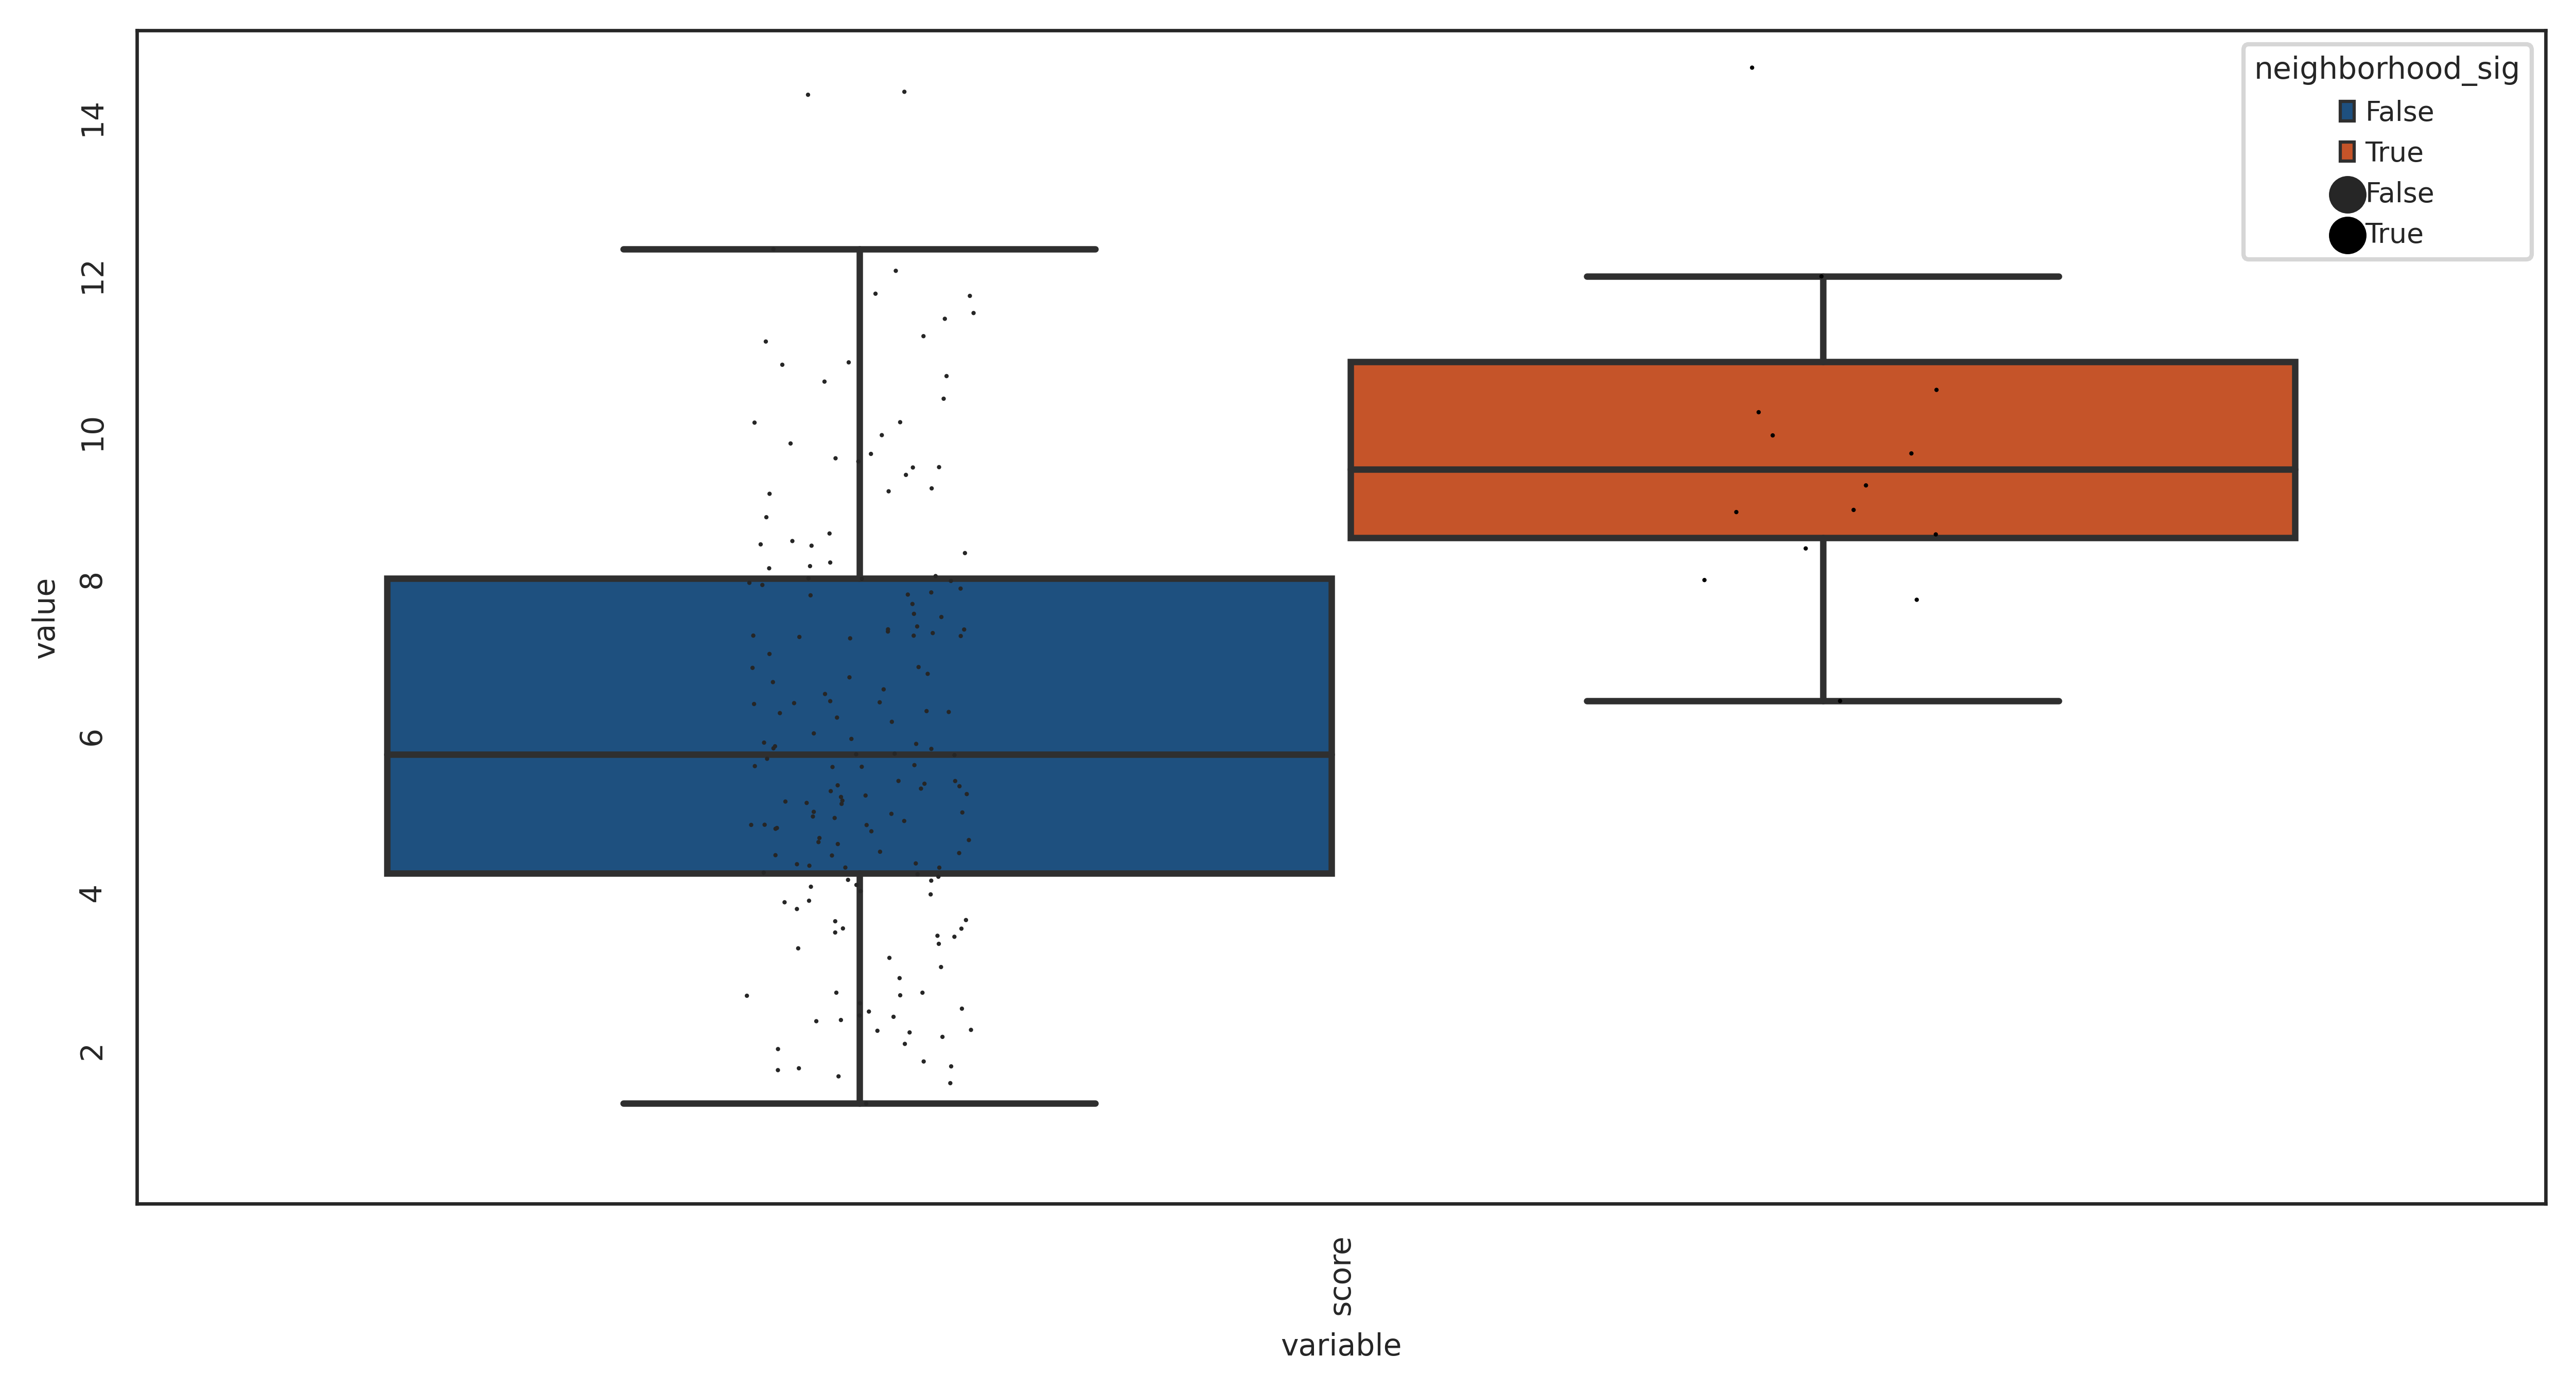

In [26]:
subset_factors = True
factors_of_interest = [
   'score'
                        ]
if subset_factors:
    plot_df_sub = plot_df[plot_df['variable'].isin(factors_of_interest)]
else:
    plot_df_sub = plot_df
    
save_name = 'Zhang_TAM_factor_DE_interaction_score.svg'
sns.set_style('white')
fig,ax = plt.subplots(figsize=(10, 5))
ax.tick_params(labelrotation=90)
#ax.set_ylim(-0.01,0.3)
ax.set_ylim(0.06,15)
sns.boxplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#D3D2D1',fliersize=0,palette={True:'#DF480F', False:'#0E518F'})#,order=factors_of_interest,
           
sns.stripplot(x="variable", y="value", hue='neighborhood_sig',data=plot_df_sub,color='#000000',dodge=True,s=1)#order=factors_of_interest)
#plt.axhline(y=1,color='#000000', linestyle='--')
plt.savefig(fig_save_path+save_name)
print('saved to:',fig_save_path+save_name)

In [27]:
#Cohen's d
df_sub_1 = plot_df_sub[plot_df_sub['neighborhood_sig']]
df_sub_2  = plot_df_sub[~plot_df_sub['neighborhood_sig']]
(np.mean(df_sub_1['value'])-np.mean(df_sub_2['value']))/np.std(list(df_sub_1['value'])+list(df_sub_2['value']))

1.0302421717456776

In [29]:
#test neighborhoods specifically expanding in non-responders vs rest

p_df = pd.DataFrame()

for i in factors_of_interest:
    plot_df_sub_fac = plot_df[plot_df['variable']==i]
    x = list(plot_df_sub_fac[plot_df_sub_fac['neighborhood_sig']==True]['value'])
    y = list(plot_df[plot_df['neighborhood_sig']==False]['value'])
    a = scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')
    p_df.loc[i,'stat'] = a[0]
    p_df.loc[i,'p'] = a[1]
    
p_df

,stat,p
score,600886.0,3.739548e-12


# plot expression of individual genes in NR expanding macrophages vs other


In [30]:

data_TAM_path = DATA_DIR + 'TIL-X-BRCA-X-Zhang-X-2021-X-all_cells_raw_annotated_clustered_nodrops_nodoub_tumor_scran_labeled_clustered_annotated_211208_removed-doublets_PrevsOn_SDPD_allpatients_TAM.h5ad'


In [31]:
#load data
data_TAM = sc.read(data_TAM_path)
data_TAM = data_TAM.obs

In [32]:
#get neighborhoods of interest
sig_neighborhoods = set(plot_df[plot_df['neighborhood_sig']].index)
sig_neighborhoods

{0,
 32771,
 8197,
 8198,
 8201,
 32779,
 24590,
 8208,
 16407,
 8216,
 27,
 16416,
 32808,
 32814,
 16432,
 16433,
 32819,
 8245,
 24631,
 24633,
 8251,
 16443,
 8256,
 24640,
 24641,
 68,
 24644,
 70,
 24651,
 77,
 78,
 81,
 32850,
 24659,
 16470,
 88,
 32859,
 8287,
 96,
 8296,
 32875,
 32876,
 24688,
 24694,
 32886,
 8312,
 8313,
 24699,
 125,
 16511,
 16513,
 131,
 8323,
 136,
 16520,
 16521,
 16524,
 32913,
 16531,
 24730,
 16539,
 8350,
 24739,
 167,
 176,
 24755,
 24756,
 16568,
 32954,
 32956,
 16574,
 24766,
 192,
 193,
 16579,
 32963,
 32964,
 8391,
 32967,
 8393,
 203,
 32974,
 8400,
 8401,
 8404,
 32982,
 24793,
 8411,
 16610,
 8419,
 230,
 16619,
 33011,
 33017,
 16635,
 16636,
 33022,
 8448,
 24834,
 24836,
 8454,
 16646,
 8459,
 24843,
 24844,
 271,
 24847,
 273,
 24854,
 280,
 281,
 284,
 33053,
 24862,
 16673,
 291,
 33062,
 8490,
 299,
 8499,
 33078,
 33079,
 24891,
 24897,
 33089,
 8515,
 8516,
 24902,
 328,
 16714,
 16716,
 334,
 8526,
 339,
 16723,
 16724,
 16727,

In [33]:
#load adjacency matrices for significant neighborhoods storing cell indices per neighborhood index
set(plot_df['neighborhood_sig'].index).intersection(set([str(x) for x in list(neighborhood_cell_dict.keys())]))

set()

In [34]:
#get cells of interest by mapping neighborhoods
sig_cells = []
adata_neigh.obs['neighborhood_sig'] =adata_neigh.obs['neighborhood_sig'].astype(bool)
for i in adata_neigh[adata_neigh.obs['neighborhood_sig']].obs_names:
    sig_cells = sig_cells + neighborhood_cell_dict[i]
    
adata.obs['TAM_NR_sig'] = pd.Categorical(adata.obs_names.isin(sig_cells).astype(str))
adata.obs['TAM_NR_sig'].value_counts()

False    150586
True        399
Name: TAM_NR_sig, dtype: int64

In [35]:
#subset to myeloid
adata_myeloid = adata[adata.obs['annotation_SPADE_1']=='MDC']
adata_myeloid = adata_myeloid[adata_myeloid.obs['treatment']=='atezolizumab, paclitaxel']
adata_myeloid = adata_myeloid[adata_myeloid.obs['RECIST'].isin(['PD','SD'])]

adata_myeloid

View of AnnData object with n_obs × n_vars = 3206 × 20237
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'patient_id', 'biomaterial', 'timepoint', 'site', 'age', 'PD-L1_IC_Ventana', 'TIL', 'T', 'N', 'M', 'treatment', 'RECIST', 'biopsied_lesion_size', '8w_biopsied_lesion', 'target_lesion_size', '8w_target_lesion', 'PFS', 'last_follow_up', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'annotation_SPADE_1', 'annotation_SPADE_2', '0-X-all_multidrug-resistance', '1-X-all_porphyrine-heme_metabolism', '2-X-all_TNF-via-NFkB_signaling', '3-X-all_glyoxylate-dicarboxylate_metabolism', '4-X-all_IL6-JAK-STAT3_signaling', '5-X-all_fatty-acid-beta-oxidation-peroxisomal', '6-X-all_triacylglycerol_synthesis', '7-X-all_circadian-rhythm', '8-X-all_hepar

In [41]:
#calculate pos frac
thresh=0
group_obs = 'TAM_NR_sig'

#set everything below threshold 0
plotting_df = pd.DataFrame(adata_myeloid[:,A].X.todense(),columns=A,index=adata_myeloid.obs_names)
plotting_df_thresh = plotting_df.applymap(lambda x: 0 if x < thresh else x)
plotting_df_thresh_group = plotting_df_thresh
plotting_df_thresh_group['groups'] = adata_myeloid.obs[group_obs].astype(str)

df = plotting_df_thresh_group.copy()
df_frac = pd.DataFrame()

#calculate positive fraction per gene program and cell type
for i in df.drop(columns='groups').columns:
    df['sign'] = np.sign(df[i])
    allzero  = df['sign'] == 0
    nonezero  = df['sign'] != 0
    if allzero.all() ==False and nonezero.all()==False:
        pos_cells = df.groupby('groups').sign.value_counts()
        pos_frac = pos_cells.unstack()[1].fillna(1)/(pos_cells.unstack()[0].fillna(1)+pos_cells.unstack()[1].fillna(1))
        df_frac[i] = pos_frac
    elif nonezero.all()==True:
        print('for',i,'no negative cells were detected, setting positive fraction to 1')
        df_frac[i] = [1]*(len(df.groupby('groups')))
    elif allzero.all()==True:
        print('for',i,'no positive cells were detected, setting positive fraction to 0')
        df_frac[i] = [0]* (len(df.groupby('groups')))

df_frac

,SPP1,MMP9,CTSL,CCL2,APOC1,RNASE1,NUPR1,C15orf48,GPNMB,CXCL8,...,SCD,GLUL,CCL18,TYROBP,NR1H3,NPL,CSTB,ANPEP,CTSD,LGALS3
groups,,,,,,,,,,,,,,,,,,,,,
False,0.478803,0.18632,0.853580,0.754542,0.751336,0.588529,0.472034,0.625579,0.723192,0.629854,...,0.295689,0.925543,0.128607,0.999287,0.187389,0.463128,0.939437,0.224083,0.888493,0.905949
True,0.496241,0.18797,0.922306,0.220551,0.997500,0.027569,0.969925,0.639098,0.997494,0.558897,...,0.192982,0.969925,0.701754,0.997500,0.385965,0.741855,0.992481,0.075188,0.997494,0.982456


In [42]:
#zscore
adata_myeloid = adata[adata.obs['annotation_SPADE_1']=='MDC']
adata_myeloid.layers['zscored'] = scipy.stats.zscore(np.array(adata_myeloid.X.todense()),axis=0)

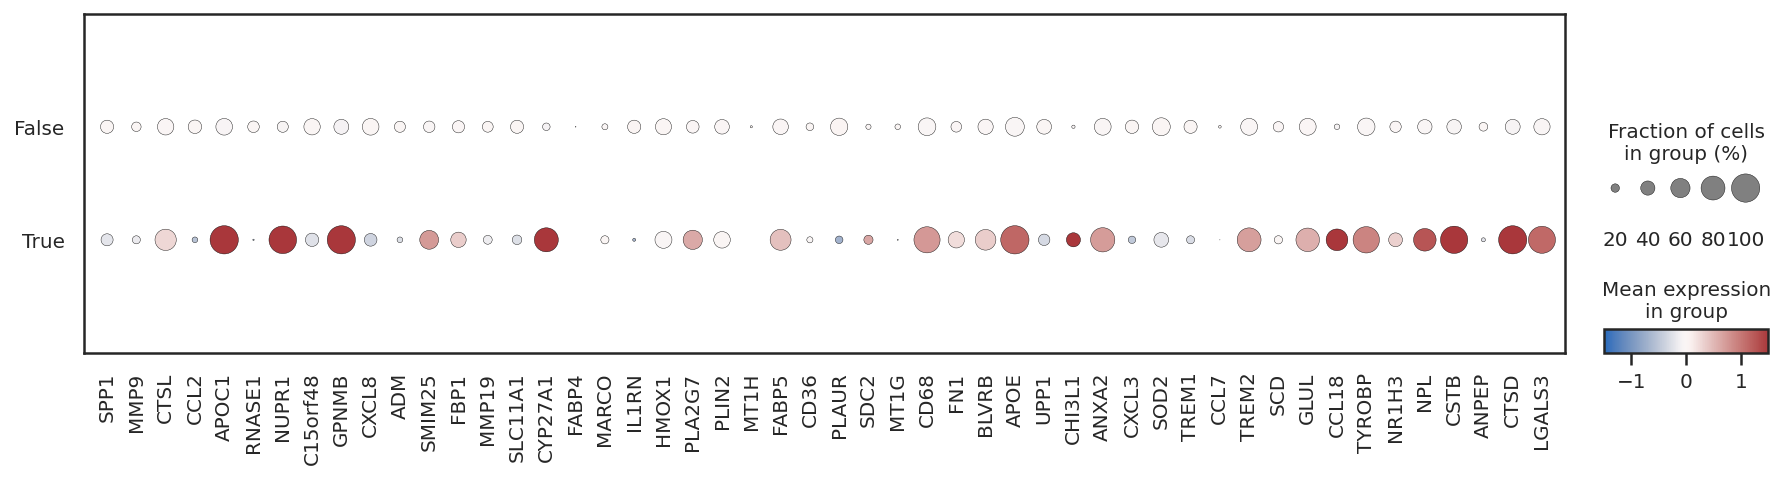

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Dot_plot_Zhang_Bassez_genes.svg


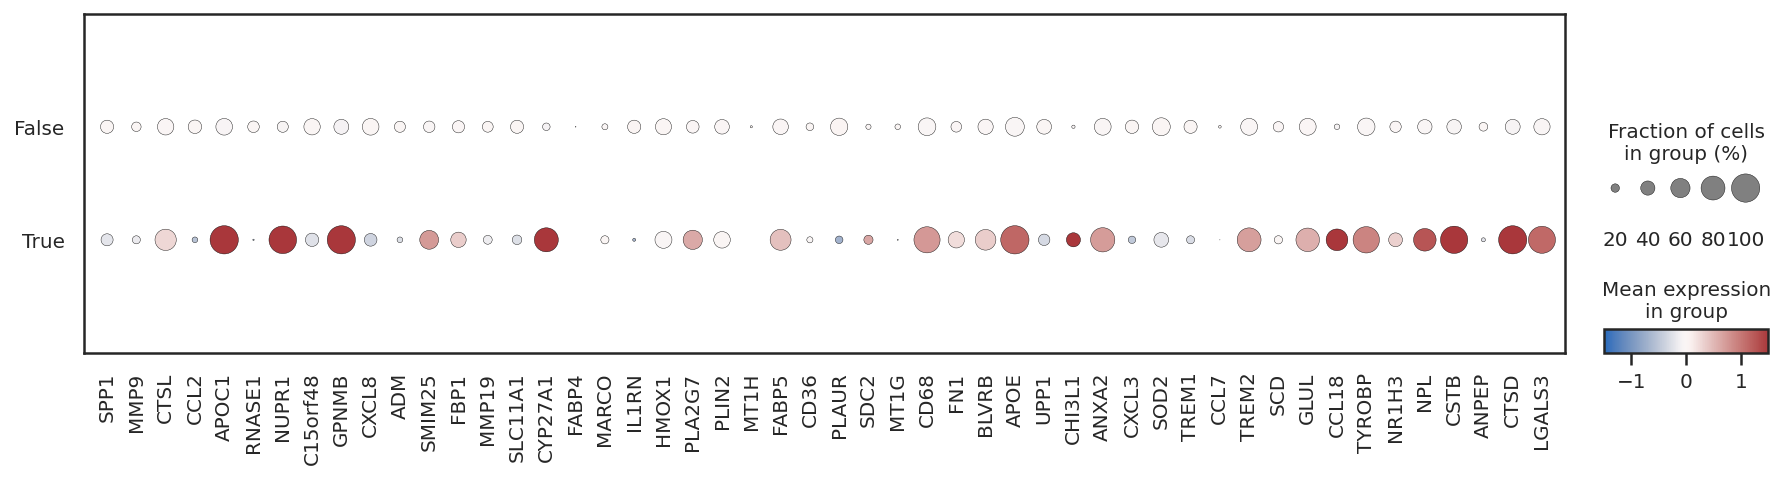

In [43]:
#Bassez genes


## dotplot

pheno_heat = 'TAM_NR_sig'
save_name = 'Dot_plot_Zhang_Bassez_genes.svg'

%matplotlib inline
sns.set(font_scale = 1)
sns.set_style('white')
dp = sc.pl.dotplot(adata_myeloid,A, groupby=pheno_heat,standard_scale=None, dendrogram=False, return_fig=True,
                 figsize=(15,3),save=save_name, layer='zscored', vmin=-1.5,vmax=1.5)

dp.style(cmap='vlag').show()
dp.savefig(fig_save_path + save_name)
#dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()
#dp.savefig(save_name)
print('saved Figure to:',fig_save_path+save_name)

In [44]:
#replace dot_sizes calculated on zscored to dot_sizes calculated on scran normalized data
dp.dot_size_df = df_frac[dp.dot_size_df.columns]

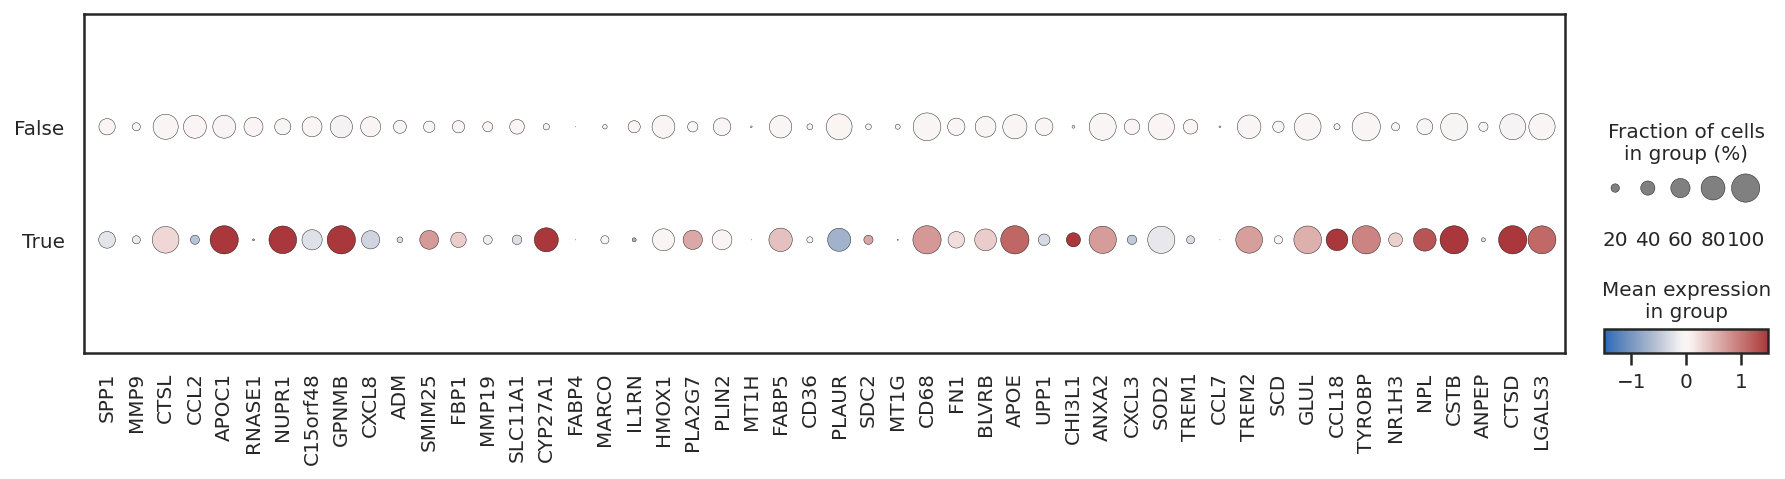

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/figures/Dot_plot_Zhang_Bassez_genes.svg


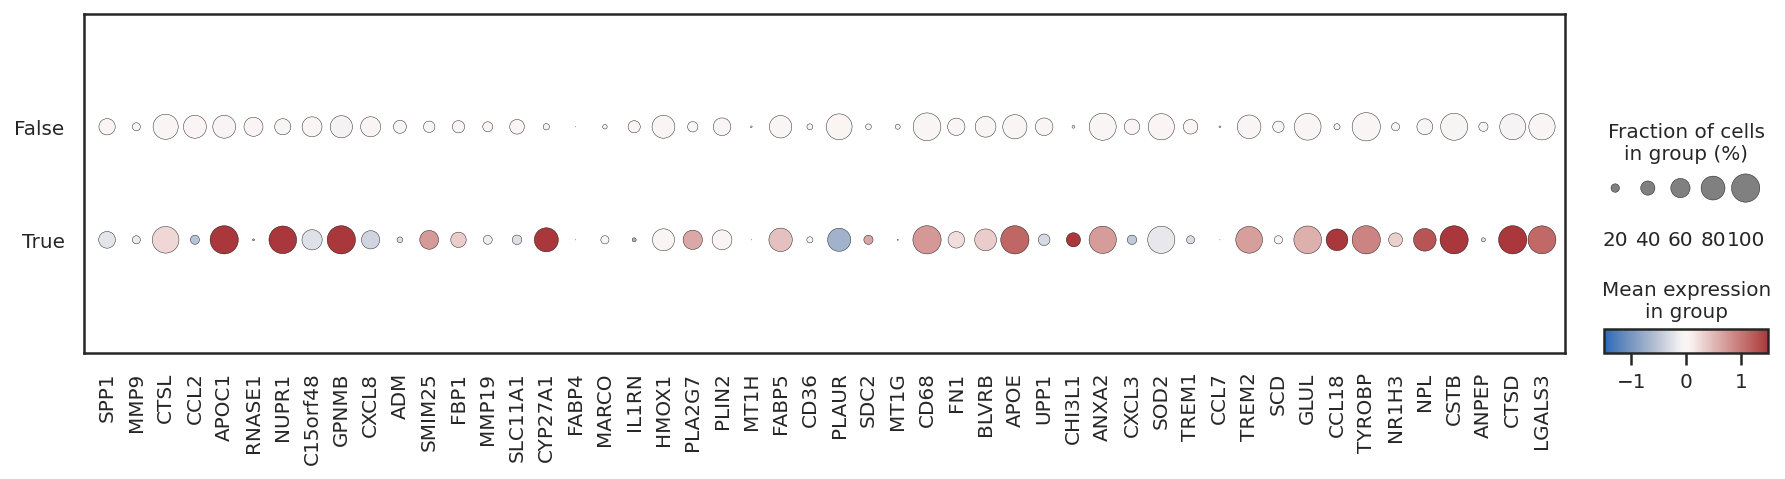

In [45]:
#Bassez genes
dp.style(cmap='vlag').show()
dp.savefig(fig_save_path + save_name)
#dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()
#dp.savefig(save_name)
print('saved Figure to:',fig_save_path+save_name)